# Variational Autoencoder (VAE)

Useful links: 
* Original paper http://arxiv.org/abs/1312.6114
* Helpful videos explaining the topic 
   * https://www.youtube.com/watch?v=P78QYjWh5sM     
   * http://videolectures.net/deeplearning2015_courville_autoencoder_extension/?q=aaron%20courville

In this homework we will train an autoencoder to model images of faces. For this we take "Labeled Faces in the Wild" dataset [http://vis-www.cs.umass.edu/lfw/](http://vis-www.cs.umass.edu/lfw/), deep funneled version of it. (frontal view of all faces)


## Prepare the data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# The following code fetches you two datasets: images, usable for autoencoder training and attributes.
# Those attributes will be required for the final part of the assignment (applying smiles), so please keep them in mind
from lfw_dataset import fetch_lfw_dataset
    
data, attrs = fetch_lfw_dataset()

In [4]:
attrs.f

,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,1.56835,-1.88904,1.7372,-0.929729,-1.4718,-0.19558,-0.835609,-0.351468,-1.01253,-0.719593,...,0.361738,1.16612,-1.16492,-1.13999,-2.37175,-1.29993,-0.414682,-1.1449,0.694007,-0.826609
1,0.169851,-0.982408,0.422709,-1.28218,-1.36006,-0.867002,-0.452293,-0.197521,-0.956073,-0.802107,...,-0.832036,-0.39768,0.87416,-0.945431,-0.268649,-0.00624408,-0.0304057,-0.480128,0.66676,-0.496559
2,0.997749,-1.36419,-0.157377,-0.756447,-1.89183,-0.871526,-0.862893,0.0314447,-1.34152,-0.0900375,...,1.54974,1.88475,-0.999765,-1.35986,-1.91211,-1.09563,0.915126,-0.572332,0.144262,-0.841231
3,1.12272,-1.9978,1.91614,-2.51421,-2.58007,-1.40424,0.0575511,0.000195882,-1.27351,-1.43146,...,0.567822,-0.176089,1.10812,-1.60094,-3.26461,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,1.07821,-2.0081,1.67621,-2.27806,-2.65185,-1.34841,0.649089,0.0176564,-1.88911,-1.85721,...,-1.46147,-0.955283,0.119113,-1.12818,-3.16105,0.0826804,-0.439614,-0.359859,-0.760774,-0.410152
5,0.850491,-1.48208,1.90852,-1.87365,-3.22993,-0.864006,0.31382,-0.35268,-1.55929,-1.91459,...,1.77547,-1.0635,1.35435,-0.960133,-5.35464,1.15002,-0.142195,-0.672725,0.886694,-0.154051
6,0.944548,-1.37722,1.29906,-1.40534,-1.86233,-0.502664,-0.48629,0.0150016,-0.892478,-0.586615,...,0.155763,-0.0333257,-0.869705,-0.942216,-3.77615,-1.0283,0.0992853,-0.335493,0.185644,-0.671966
7,1.59467,-1.50443,0.441401,-1.77175,-2.44985,-1.10597,-0.0425912,-0.136437,-1.00851,0.653294,...,-3.25803,0.128691,-1.57324,-1.10214,-1.12391,-1.39417,1.52065,-0.487475,0.601968,-0.617698
8,0.286489,-1.90351,0.697239,-1.85985,-1.44025,-1.55243,0.102555,-0.191471,-0.726333,-0.226157,...,-1.41784,-0.483956,0.717483,-0.288405,-2.29545,0.937971,1.23307,-0.632812,0.00999485,-0.144265
9,0.663497,-1.03694,0.46161,-2.49853,-2.81593,-1.63779,-0.20148,-0.134941,-1.32816,-0.712721,...,1.43291,0.771419,1.59549,-0.697505,-2.51197,0.98124,0.424768,-0.518236,-0.306921,0.348492


In [5]:
X_train = data[:10000].reshape((10000, -1))
print(X_train.shape)
X_val = data[10000:].reshape((-1, X_train.shape[1]))
print(X_val.shape)

image_h = data.shape[1]
image_w = data.shape[2]

(10000, 6075)
(3143, 6075)


For simplicity we want all values of the data to lie in the interval $[0,1]$:

In [6]:
X_train = np.float32(X_train)
X_train = X_train/255
X_val = np.float32(X_val)
X_val = X_val/255

In [7]:
def plot_gallery(images, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w, 3)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

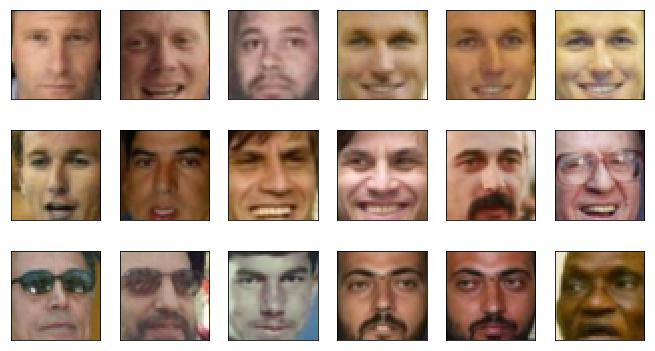

In [86]:
plot_gallery(X_train, image_h, image_w)

# Autoencoder

Why to use all this complicated formulaes and regularizations, what is the need for variational inference? To analyze the difference, let's first train just an autoencoder on the data:

<img src="Autoencoder_structure.png" alt="Autoencoder">

In [9]:
dimZ = 100 # Considering face reconstruction task, which size of representation seems reasonable?

# Define the decoder and encoder as networks with one hidden fc-layer
def autoencoder(x):
    
    layer_1 = tf.layers.dense(inputs=x ,name = "layer1", units = 128, activation = tf.nn.relu,
                              kernel_initializer=tf.contrib.layers.xavier_initializer()
)
    layer_2 = tf.layers.dense(inputs=layer_1 ,name = "layer2", units = 100, activation = None,
                             kernel_initializer=tf.contrib.layers.xavier_initializer()
)
    
    layer_3 = tf.layers.dense(inputs=layer_2 ,name = "layer3", units = 128, activation = tf.nn.relu,
                             kernel_initializer=tf.contrib.layers.xavier_initializer()
)
    layer_4 = tf.layers.dense(inputs=layer_3 ,name = "layer4", units = x.shape[1], activation = tf.nn.sigmoid
                             ,kernel_initializer=tf.contrib.layers.xavier_initializer()
)
    
    latent = layer_2
    reconstr = layer_4
    diff = reconstr - x
    loss = tf.reduce_mean(diff * diff)
    return (loss, reconstr, latent)

# (that means you will have 2 fc layers in each net)
# Use ReLU for hidden layers' activations
# GlorotUniform initialization for W
# Zero initialization for biases
# It's also convenient to put sigmoid activation on output layer to get nice normalized pics

In [35]:
# Create MSE loss function
print(reconstr)
# Use Adam optimizer

Tensor("layer6/Sigmoid:0", shape=(?, 6075), dtype=float32)


epoch 0, training loss: 0.0174259
Model saved in file: /tmp/model.ckpt
epoch 1, training loss: 0.0125603
epoch 2, training loss: 0.0107289
epoch 3, training loss: 0.00957662
epoch 4, training loss: 0.00851955
epoch 5, training loss: 0.00749698
Model saved in file: /tmp/model.ckpt
epoch 6, training loss: 0.00662923
epoch 7, training loss: 0.00607765
epoch 8, training loss: 0.00577006
epoch 9, training loss: 0.0055376
epoch 10, training loss: 0.00534039
Model saved in file: /tmp/model.ckpt
epoch 11, training loss: 0.00519877
epoch 12, training loss: 0.00510541
epoch 13, training loss: 0.00503523
epoch 14, training loss: 0.00497114
epoch 15, training loss: 0.0049101
Model saved in file: /tmp/model.ckpt
epoch 16, training loss: 0.00485556
epoch 17, training loss: 0.0048124
epoch 18, training loss: 0.00478481
epoch 19, training loss: 0.00476766
epoch 20, training loss: 0.00475412
Model saved in file: /tmp/model.ckpt
epoch 21, training loss: 0.00474184
epoch 22, training loss: 0.00472958
epo

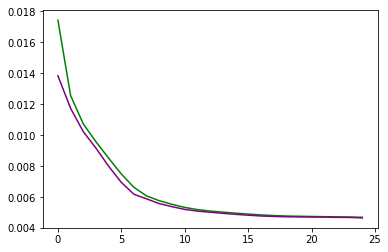

In [13]:
tf.reset_default_graph();
model_path = "/tmp/model.ckpt"

x = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]])

(loss,reconstr,latent) = autoencoder(x)
train_step = tf.train.AdamOptimizer(learning_rate=1.0e-4).minimize(loss)

saver = tf.train.Saver()

n_batch = 4
n_epoch = 25
n_train = X_train.shape[0]
n_test = X_val.shape[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    loss_train_epoch = {}
    loss_test_epoch = {}
    for i_epoch in range(0, n_epoch):
        loss_total = 0

        rng_minibatches = range(0, n_train - n_batch + 1, n_batch)
        for start_idx in rng_minibatches:
            X_train_batch = X_train[start_idx:(start_idx+n_batch),:]
            
            [loss_val,reconstr_val,latent_val] = sess.run([loss,reconstr,latent], feed_dict={x:X_train_batch})
            
            loss_total += loss_val
            
            train_step.run(feed_dict={x:X_train_batch})
        loss_avg = loss_total / (len(rng_minibatches)*1.0)
        
        print("epoch %d, training loss: %g" % (i_epoch, loss_avg))
        if ((i_epoch % 5) == 0):
            save_path = saver.save(sess, model_path)
            print("Model saved in file: %s" % save_path)    
            
        loss_train_epoch[i_epoch] = loss_total / len(rng_minibatches)
        
        loss_test = 0        
        rng_minibatches = range(0, n_test - n_batch + 1, n_batch)
        for start_idx in rng_minibatches:
            X_test_batch = X_val[start_idx:(start_idx+n_batch),:]
       
            [loss_val] = sess.run([loss], 
                                           feed_dict={x: X_test_batch})
            
            loss_test += loss_val
            
        loss_test_epoch[i_epoch] = loss_test / len(rng_minibatches)
        
    plt.plot(loss_train_epoch.keys(),loss_train_epoch.values(), color ='green')
    plt.plot(loss_test_epoch.keys(),loss_test_epoch.values(), color ='purple')
    plt.show()
    
# Visualize progress in reconstruction and loss decay

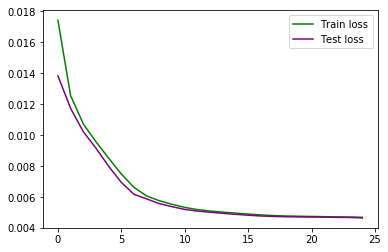

In [16]:
# Examine the reconstructions
plt.plot(loss_train_epoch.keys(),loss_train_epoch.values(), color ='green', label='Train loss')
plt.plot(loss_test_epoch.keys(),loss_test_epoch.values(), color ='purple', label = 'Test loss')
plt.legend()
plt.show()

Reconstruction is not bad, right? 

# Sampling

Let's now sample several latent vectors and perform inference from $z$, reconstruct an image given some random $z$ representations.

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file: /tmp/model.ckpt


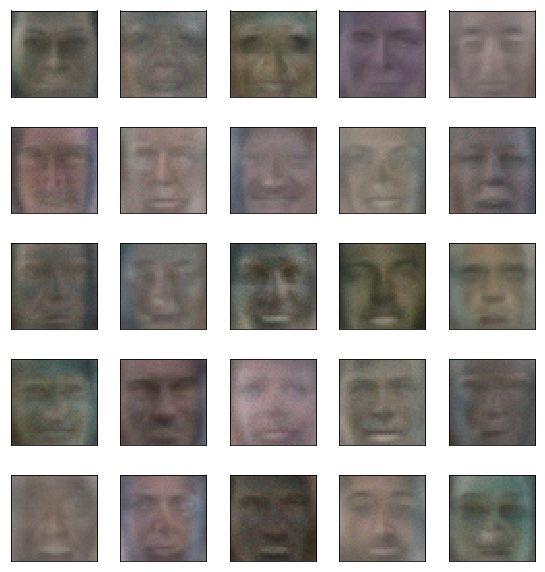

In [14]:
z = np.random.randn(25, dimZ)*0.8
with tf.Session() as sess:
    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)
    
    # compute the reconstruction based on the latent representation
    [reconstr_val] = sess.run([reconstr], feed_dict={latent:z})

output = reconstr_val # FIXME compute from decoder from z
plot_gallery(output, image_h, image_w, n_row=5, n_col=5)

So, if we sample $z$ from normal, whould we eventually generate all possible faces? What do you think?

# Variational Autoencoder

Bayesian approach in deep learning considers everything in terms of distributions. Now our encoder generates not just a vector $z$ but posterior ditribution $q(z|x)$. In our case distribution $q$ is Gaussian distibution $N(\mu, \sigma)$ with parameters $\mu$, $\sigma$. Technically, the first difference is that you need to split bottleneck layer in two. One dense layer will generate vector $\mu$, and another will generate vector $\sigma$. Reparametrization trick should be implemented using the **gaussian_sampler**, that generates random vetor $\epsilon$ and returns $\mu+\sigma\epsilon \sim N(\mu, \sigma)$ .

Since our decoder is also a function that generates distribution, we need to do the same splitting for output layer. When testing the model we will look only on mean values, so one of the output will be actual autoencoder output.

In this homework we only ask for implementation of the simplest version of VAE - one $z$ sample per input. You can consider to sample several outputs from one input and average them.

In [160]:
def variational_autoencoder(x):
    
    enc_layer_1 = tf.layers.dense(inputs=x ,name = "enc_l1", units = 128, activation = tf.nn.relu,
                              kernel_initializer=tf.glorot_uniform_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l1_regularizer(scale=0.9),
                                 bias_regularizer=tf.contrib.layers.l1_regularizer(scale=0.5))
    
#     enc_layer_2 = tf.layers.dense(inputs=enc_layer_1 ,name = "enc_l2", units = 384, activation = tf.nn.elu,
#                               kernel_initializer=tf.contrib.layers.xavier_initializer())
    
#     enc_layer_3 = tf.layers.dense(inputs=enc_layer_2 ,name = "enc_l3", units = 256, activation = tf.nn.relu,
#                               kernel_initializer=tf.contrib.layers.xavier_initializer())
    
    z_mu = tf.layers.dense(inputs=enc_layer_1 ,name = "z_mu", units = dimZ, activation = None,
                             kernel_initializer=tf.glorot_uniform_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l1_regularizer(scale=0.9),
                                 bias_regularizer=tf.contrib.layers.l1_regularizer(scale=0.5))
    
    z_logsigma = tf.layers.dense(inputs=enc_layer_1 ,name = "z_sigma", units = dimZ, activation = None,
                             kernel_initializer=tf.glorot_uniform_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l1_regularizer(scale=0.9),
                                 bias_regularizer=tf.contrib.layers.l1_regularizer(scale=0.5))
    epsilion = 1e-6
    eps = tf.random_normal(shape=tf.shape(z_logsigma),
                           mean=0, stddev=1, dtype=tf.float32)
    z = z_mu + tf.exp(z_logsigma) * eps
    
    
    
    dec_layer_1 = tf.layers.dense(inputs=z ,name = "dec_l1", units = 128, activation = tf.nn.relu,
                                  kernel_initializer=tf.glorot_uniform_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l1_regularizer(scale=0.9),
                                 bias_regularizer=tf.contrib.layers.l1_regularizer(scale=0.5))
    
#     dec_layer_2 = tf.layers.dense(inputs=dec_layer_1 ,name = "dec_l2", units = 384, activation = tf.nn.elu,
#                                   kernel_initializer=tf.contrib.layers.xavier_initializer())
    
#     dec_layer_3 = tf.layers.dense(inputs=dec_layer_2 ,name = "dec_l3", units = 512, activation = tf.nn.elu,
#                                   kernel_initializer=tf.contrib.layers.xavier_initializer())
    
    x_mu = tf.layers.dense(inputs=dec_layer_1 ,name = "x_mu", units = x.shape[1],
                                         activation = tf.nn.sigmoid
                                         ,kernel_initializer=tf.glorot_uniform_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l1_regularizer(scale=0.9),
                                 bias_regularizer=tf.contrib.layers.l1_regularizer(scale=0.5))

    x_logsigma = tf.layers.dense(inputs=dec_layer_1 ,name = "x_sigma", units = x.shape[1],
                                         activation = tf.nn.sigmoid
                                         ,kernel_initializer=tf.glorot_uniform_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l1_regularizer(scale=0.9),
                                 bias_regularizer=tf.contrib.layers.l1_regularizer(scale=0.5))
    
    eps = tf.random_normal(shape=tf.shape(x_logsigma),
                           mean=0, stddev=1, dtype=tf.float32)
    output = x_mu + tf.exp(x_logsigma) * eps
    
    # Loss
    loss = tf.reduce_mean(loss_vae(x, x_mu, x_logsigma, z_mu, z_logsigma))
#     kl = KL_divergence(z_mu, z_logsigma)
#     l = log_likelihood(x, x_mu, x_logsigma)
    return (loss, output, z, z_logsigma)


And the last, but not least! Place in the code where the most of the formulaes goes to - optimization objective. The objective for VAE has it's own name - variational lowerbound. And as for any lowerbound our intention is to maximize it. Here it is (for one sample $z$ per input $x$):

$$\mathcal{L} = -D_{KL}(q_{\phi}(z|x)||p_{\theta}(z)) + \log p_{\theta}(x|z)$$

Your next task is to implement two functions that compute KL-divergence and the second term - log-likelihood of an output. Here is some necessary math for your convenience:

$$D_{KL} = -\frac{1}{2}\sum_{i=1}^{dimZ}(1+log(\sigma_i^2)-\mu_i^2-\sigma_i^2)$$
$$\log p_{\theta}(x|z) = \sum_{i=1}^{dimX}\log p_{\theta}(x_i|z)=\sum_{i=1}^{dimX} \log \Big( \frac{1}{\sigma_i\sqrt{2\pi}}e^{-\frac{(\mu_I-x)^2}{2\sigma_i^2}} \Big)=...$$

Don't forget in the code that you are using $\log\sigma$ as variable. Explain, why not $\sigma$?

In [168]:
def KL_divergence(mu, logsigma):
    d_k_l = - 0.5 * tf.reduce_sum (1 + 2 * logsigma - mu**2 - tf.exp(2 * logsigma), axis = 1)
    # shape = (batch, )
    return d_k_l

def log_likelihood(x, mu, logsigma):
    log_p = tf.reduce_sum(-(0.5 * np.log(2 * np.pi) + logsigma) -
                          0.5 * (x - mu)**2 / tf.exp(2 * logsigma), axis = 1)
    return log_p



def loss_vae(x, mu_gen, logsigma_gen, mu_z, logsigma_z):
    loss = KL_divergence(mu_z, logsigma_z) - log_likelihood(x, mu_gen, logsigma_gen)
    return loss

In [167]:
# to compare with conventional AE, keep these hyperparameters
# or change them for the values that you used before
dimZ = 100

# define the network
# you can start from pytorch example https://github.com/pytorch/examples/blob/master/vae/main.py
# or Theano-based examples here https://github.com/Lasagne/Recipes/blob/master/examples/variational_autoencoder/variational_autoencoder.py
# and here https://github.com/y0ast/Variational-Autoencoder/blob/master/VAE.py
# but remember that this is not your ground truth since the data is not MNIST

tf.reset_default_graph();
model_path = "/tmp/model1.ckpt"

x = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]])

(loss,reconstr,latent, kl) = variational_autoencoder(x)
train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)

saver = tf.train.Saver()

n_batch = 40
n_epoch = 26
n_train = X_train.shape[0]
n_test = X_val.shape[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    var_loss_train_epoch = {}
    var_loss_test_epoch = {}
    for i_epoch in range(0, n_epoch):
        loss_total = 0

        rng_minibatches = range(0, n_train - n_batch + 1, n_batch)
        for start_idx in rng_minibatches:
            X_train_batch = X_train[start_idx:(start_idx+n_batch),:]
            [loss_val,reconstr_val,latent_val, kl_val] = sess.run([loss,reconstr,latent, kl], feed_dict={x:X_train_batch})
            
            loss_total += loss_val
            
            train_step.run(feed_dict={x:X_train_batch})
        print(kl_val)
#         print(l_val)
        loss_avg = loss_total / (len(rng_minibatches)*1.0)
        
        print("epoch %d, training loss: %g" % (i_epoch, loss_avg))
        if ((i_epoch % 5) == 0):
            save_path = saver.save(sess, model_path)
            print("Model saved in file: %s" % save_path)    
            
        var_loss_train_epoch[i_epoch] = loss_avg
        
       
        [loss_avg] = sess.run([loss], 
                                       feed_dict={x: X_val})
        print("epoch %d, test loss: %g" % (i_epoch, loss_avg))
        var_loss_test_epoch[i_epoch] = loss_avg
        
    plt.plot(var_loss_train_epoch.keys(), var_loss_train_epoch.values(), color ='green')
    plt.plot(var_loss_test_epoch.keys(), var_loss_test_epoch.values(), color ='purple')
    plt.show()
    
# Visualize progress in reconstruction and loss decay

[[ 0.16056712 -0.6569741  -0.32318664 ...  0.03467934 -0.06845896
  -0.05622316]
 [ 0.18134734  0.26617697  0.12919973 ... -0.0551747  -0.16063
  -0.11415553]
 [ 0.13758822 -0.191079   -0.09755564 ...  0.03688863 -0.11387001
   0.01089215]
 ...
 [ 0.19499029  0.0228583   0.05165729 ... -0.06147639 -0.24447398
  -0.10801417]
 [ 0.2538085   0.07070568 -0.10134971 ... -0.01469136 -0.23410963
   0.00080353]
 [ 0.2262526  -0.36053514 -0.08277136 ...  0.05148861 -0.19535325
  -0.11871368]]
epoch 0, training loss: 6075.61
Model saved in file: /tmp/model1.ckpt
epoch 0, test loss: 5682.39
[[-0.07533187 -0.73234266 -0.36841312 ...  0.10045849  0.14093609
  -0.30605692]
 [ 0.08071901  0.50354236  0.12411096 ... -0.3194406  -0.16830254
  -0.03896863]
 [-0.03449203 -0.33742458 -0.15871558 ...  0.04431228  0.01851882
  -0.15497674]
 ...
 [ 0.01091257  0.2104101   0.04096309 ... -0.3572163  -0.19397865
  -0.04279877]
 [ 0.03148031 -0.15031362 -0.20137155 ... -0.06232369 -0.03977649
  -0.17333038]
 [-

KeyboardInterrupt: 

And train the model:

In [ ]:
# train your autoencoder
# visualize progress in reconstruction and loss decay

In [ ]:
# test your autoencoder with validation data

And finally sample from VAE.

In [ ]:
# TODO
# Sample some images from the learned distribution
# 1) Sample z ~ N(0,1)
# 2) Sample from N(decoder_mu(z), decoder_sigma(z))

Even if in practice you do not see the much difference between AE and VAE, or VAE is even worse, the little bayesian inside you should be jumping for joy right now. 

In VAE you can truly sample from image distribution $p(x)$, while in AE there is no easy and correct way to do it. 

# Congrats! and Bonus

If you managed to tune your autoencoders to converge and learn something about the world, now it's time to make fun out of it. As you may have noticed, there are face attributes in dataset. We're interesting in "Smiling" column, but feel free to try others as well! Here is the first task:

1) Extract the "Smilling" attribute and create a two sets of images: 10 smiling faces and 10 non-smiling ones.

2) Compute latent representations for each image in "smiling" set and average those latent vectors. Do the same for "non-smiling" set. You have found **"vector representation"** of the "smile" and "no smile" attribute.

3) Compute the difference: "smile" vector minus "non-smile" vector.

3) Now check if **"feature arithmetics"** works. Sample a face without smile, encode it and add the diff from p. 3. Check if it works with both AE and VAE. 

<img src="linear.png" alt="linear">

In [120]:
attrs['Smiling']

0         -0.86499
1         0.798544
2         0.172817
3         0.563327
4         0.507786
5          1.32771
6           -1.251
7        -0.939041
8          1.04339
9          1.27319
10         -1.2233
11         1.04279
12       -0.220004
13        -0.54646
14       -0.870051
15       -0.510474
16       -0.838358
17        -1.21366
18        0.931948
19       -0.358616
20        -0.27076
21       -0.283675
22        -1.13451
23        0.172405
24       -0.858776
25       -0.878329
26         1.51203
27        0.049088
28        -0.16554
29       -0.930185
           ...    
13113     -1.04681
13114     0.372208
13115    -0.896223
13116     0.466567
13117     0.510623
13118     0.228673
13119    -0.252595
13120    -0.286964
13121     0.442204
13122    0.0913919
13123      0.98615
13124      1.12428
13125      1.04063
13126    -0.324507
13127     -1.73822
13128    -0.922355
13129    -0.212761
13130     -1.22409
13131    0.0739869
13132    0.0899515
13133     0.097648
13134     -1